# EDA

As a result of this EDA, we have taken the following __methodological decisions__:
* 50 observations (1%) deleted for containing missing data
* Log-transform BoxOffice, runtimeMinutes and numVotes

***


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from numpy import log
from scipy.stats import skew, shapiro

import missingno as mn

import statsmodels.api as sm

In [4]:
data = pd.read_parquet('../10-data/data_final.parquet')

In [5]:
#ProfileReeóport(data)

<Axes: >

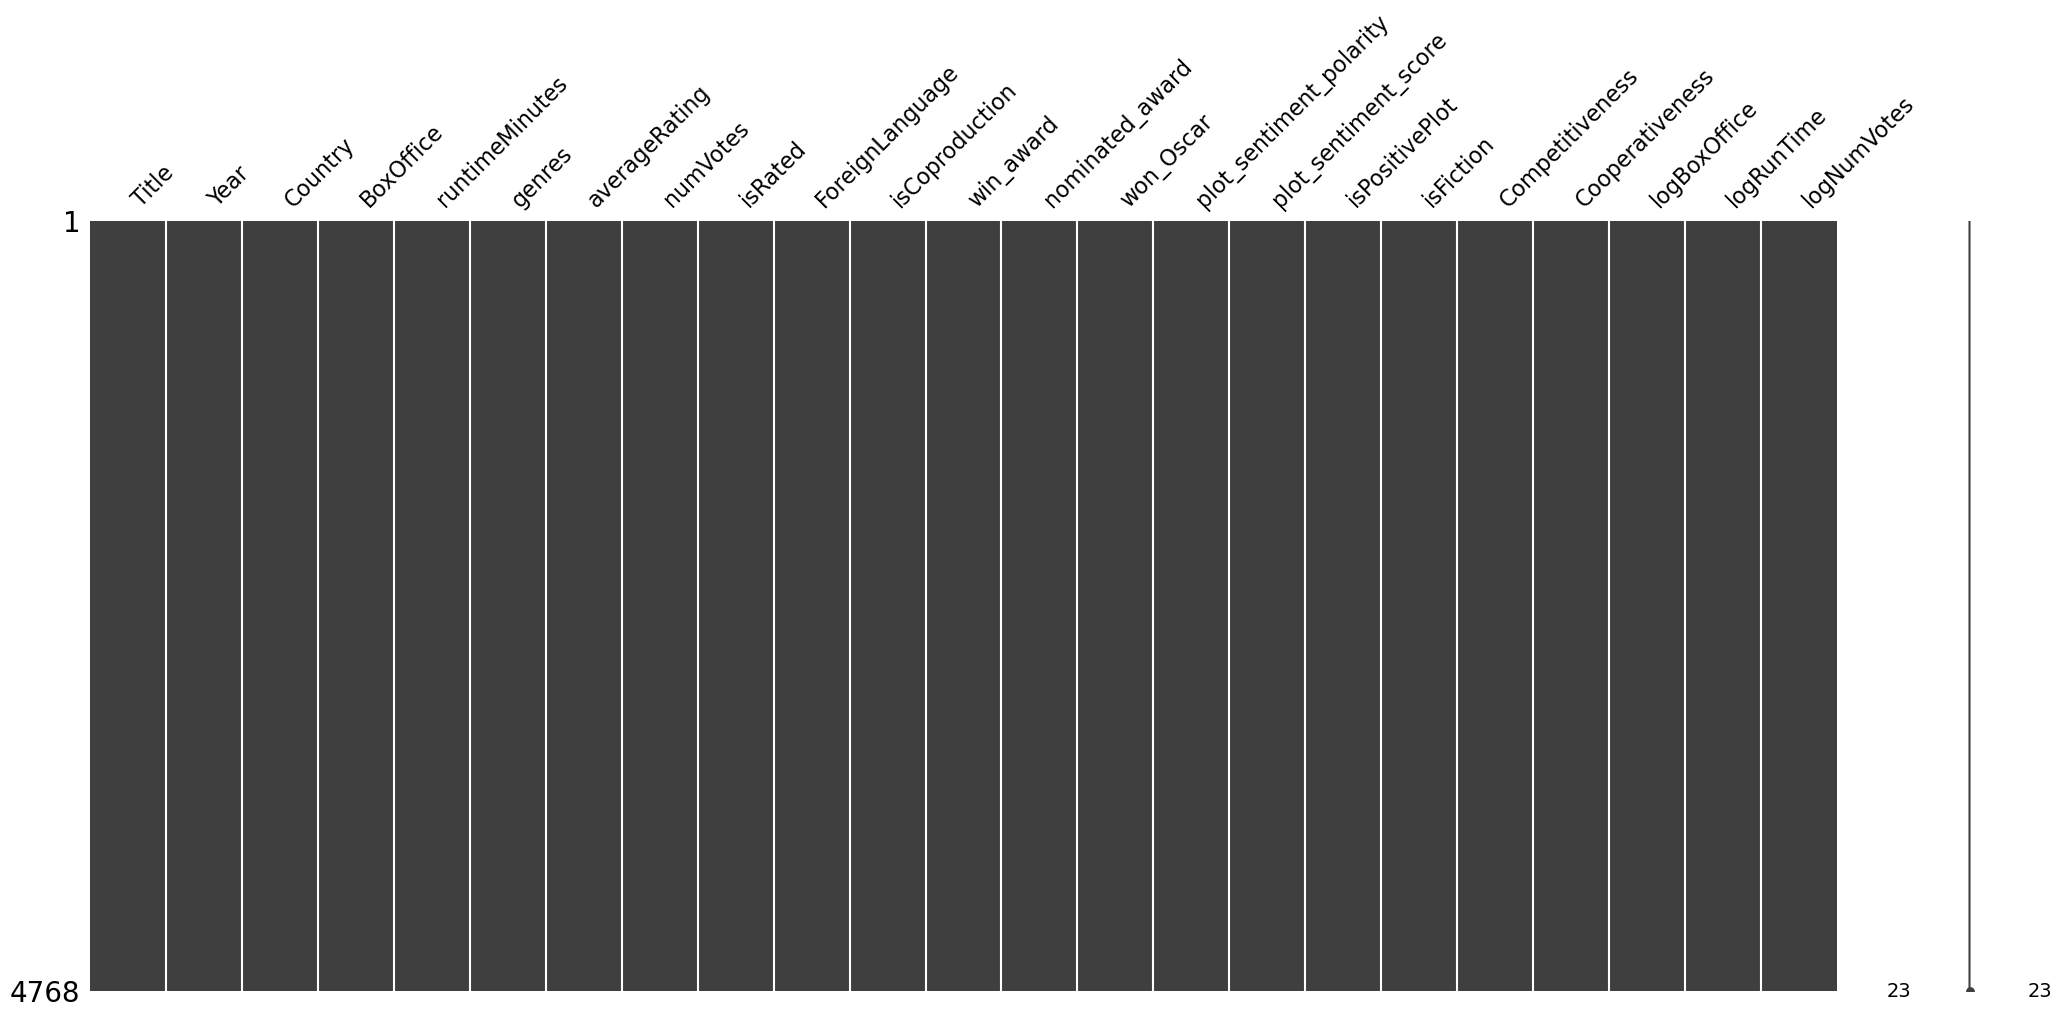

In [6]:
mn.matrix(data)

In [7]:
data.isna().sum()

Title                      0
Year                       0
Country                    0
BoxOffice                  0
runtimeMinutes             0
genres                     0
averageRating              0
numVotes                   0
isRated                    0
ForeignLanguage            0
isCoproduction             0
win_award                  0
nominated_award            0
won_Oscar                  0
plot_sentiment_polarity    0
plot_sentiment_score       0
isPositivePlot             0
isFiction                  0
Competitiveness            0
Cooperativeness            0
logBoxOffice               0
logRunTime                 0
logNumVotes                0
dtype: int64

In [8]:
a, _ = data.shape
data = data.dropna()
b, _ = data.shape
print(a-b, (a-b)/a)
del a, b

0 0.0


In [9]:
data.columns

Index(['Title', 'Year', 'Country', 'BoxOffice', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'isRated', 'ForeignLanguage',
       'isCoproduction', 'win_award', 'nominated_award', 'won_Oscar',
       'plot_sentiment_polarity', 'plot_sentiment_score', 'isPositivePlot',
       'isFiction', 'Competitiveness', 'Cooperativeness', 'logBoxOffice',
       'logRunTime', 'logNumVotes'],
      dtype='object')

## Quantitative variables

In [133]:
quanti = ['BoxOffice','runtimeMinutes','averageRating', 'numVotes', 'Competitiveness', 'Cooperativeness']
data[quanti].describe()

,BoxOffice,runtimeMinutes,averageRating,numVotes,Competitiveness,Cooperativeness
count,4.768000e+03,4768.00000,4768.000000,4.768000e+03,4768.000000,4768.000000
mean,1.458306e+06,109.50818,6.589828,1.657630e+04,9.943312,9.947612
std,6.203433e+06,26.04283,0.919349,5.204826e+04,1.838847,1.917194
min,4.900000e+01,48.00000,1.700000,8.000000e+00,1.098612,2.476538
25%,2.840600e+04,94.00000,6.100000,1.329750e+03,8.552734,8.599455
50%,1.435195e+05,105.00000,6.700000,3.939000e+03,10.158909,10.001884
75%,7.188135e+05,119.00000,7.200000,1.246050e+04,11.492900,11.471678
max,1.748035e+08,808.00000,8.900000,1.055827e+06,13.093114,13.499464


### Skewness

In [134]:
for x in quanti:
    x_name = x
    x = data[x]
    s = skew(x)
    slog = skew(log(x))
    print(f'{x_name}, {s:.2f}, {slog:.2f}')

BoxOffice, 13.12, -0.03
runtimeMinutes, 6.54, 0.99
averageRating, -1.10, -2.14
numVotes, 10.27, -0.01
Competitiveness, -0.49, -1.27
Cooperativeness, -0.31, -1.00


**DECISION** Log-transform BoxOffice, runtimeMinutes and numVotes

In [135]:
data['logBoxOffice'] = log(data['BoxOffice'])
data['logRunTime'] = log(data['runtimeMinutes'])
data['logNumVotes'] = log(data['numVotes'])

quanti.extend(['logBoxOffice','logRunTime','logNumVotes'])

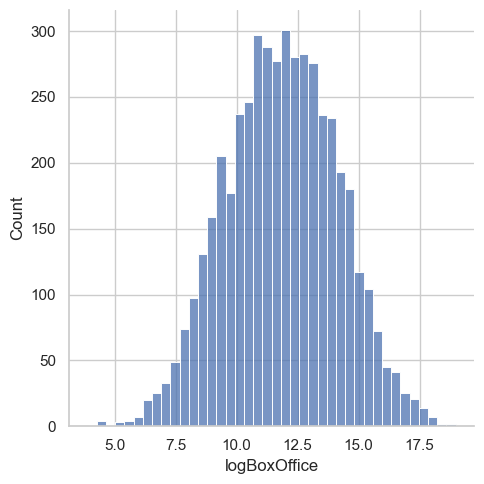

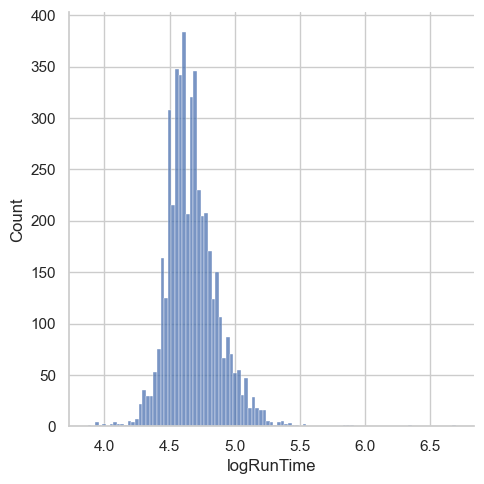

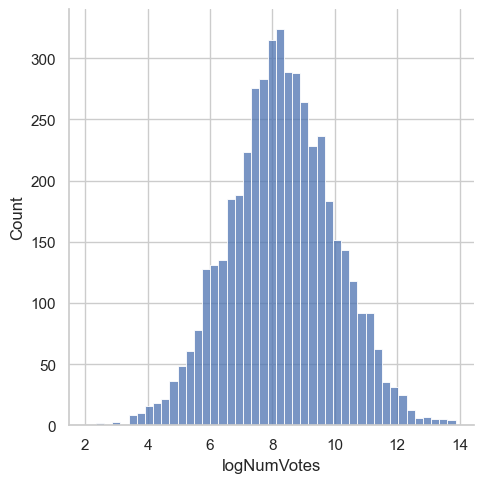

In [136]:
sns.displot(data.logBoxOffice)
sns.displot(data.logRunTime)
sns.displot(data.logNumVotes)

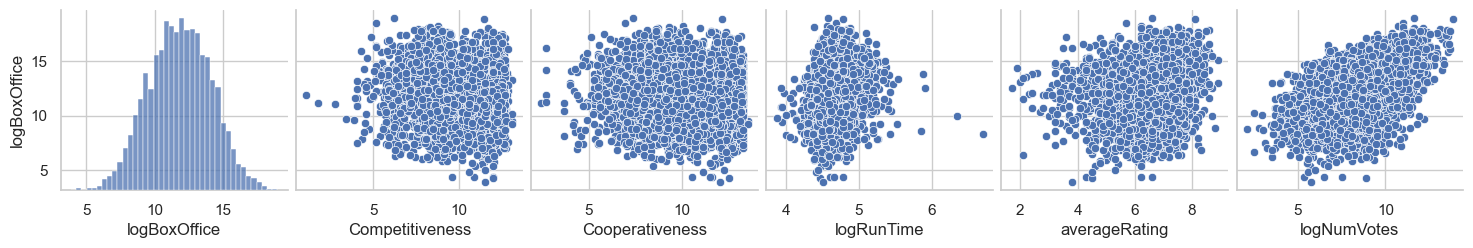

In [137]:
sns.pairplot(data[quanti],
             y_vars='logBoxOffice',
             x_vars=['logBoxOffice',
                     'Competitiveness',
                     'Cooperativeness',
                     'logRunTime',
                     'averageRating',
                     'logNumVotes'])

In [138]:
data[quanti].corr()['logBoxOffice'].sort_values(ascending=False)

logBoxOffice       1.000000
logNumVotes        0.520317
BoxOffice          0.437555
numVotes           0.326000
logRunTime         0.246886
runtimeMinutes     0.200329
averageRating      0.187303
Cooperativeness   -0.109584
Competitiveness   -0.165882
Name: logBoxOffice, dtype: float64

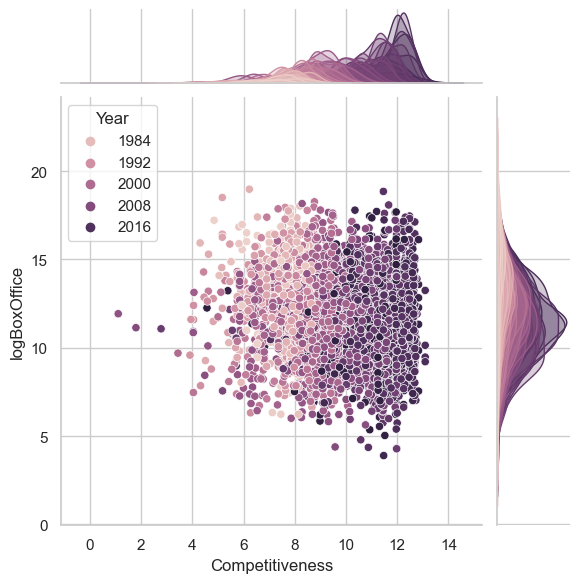

In [139]:
sns.jointplot(y='logBoxOffice',
              x = 'Competitiveness',
              hue='Year',
              data =data[['Year','Competitiveness','logBoxOffice']])

## Qualitative variables

In [1]:
data.columns

NameError: name 'data' is not defined

In [ ]:
quali = ['isRated', 'ForeignLanguage','isCoproduction', 'win_award', 'nominated_award', 'won_Oscar','isPositivePlot','isFiction']

In [2]:
data[quali].dtypes

NameError: name 'data' is not defined

In [143]:
data[quali] = data[quali].astype('int32')

### Imbalance

In [144]:
for name_x in quali:
    x = data[name_x]
    print(name_x)
    print(x.value_counts(normalize=True))

isRated
0    0.527265
1    0.472735
Name: isRated, dtype: float64
ForeignLanguage
0    0.784396
1    0.215604
Name: ForeignLanguage, dtype: float64
isCoproduction
0    0.60969
1    0.39031
Name: isCoproduction, dtype: float64
win_award
1    0.741611
0    0.258389
Name: win_award, dtype: float64
nominated_award
1    0.842282
0    0.157718
Name: nominated_award, dtype: float64
won_Oscar
0    0.986158
1    0.013842
Name: won_Oscar, dtype: float64
isPositivePlot
1    0.753146
0    0.246854
Name: isPositivePlot, dtype: float64
isFiction
1    0.96057
0    0.03943
Name: isFiction, dtype: float64
